In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import random
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap

# Configurations
IMAGE_PATH = '2D_Sliced_Images/'
MASK_PATH = '2D_Sliced_Masks/'
IMG_HEIGHT, IMG_WIDTH = 256, 256
BATCH_SIZE = 8
EPOCHS = 50
NUM_CLASSES = 3

# Load file paths
image_files = sorted([os.path.join(IMAGE_PATH, f) for f in os.listdir(IMAGE_PATH) if f.endswith('.png')])
mask_files = sorted([os.path.join(MASK_PATH, f) for f in os.listdir(MASK_PATH) if f.endswith('.png')])

In [4]:
len(image_files), len(mask_files)  # Check if the number of images and masks match

(4416, 4416)

In [5]:
np.array(image_files)

array(['2D_Sliced_Images/hepaticvessel_001_slice_10.png',
       '2D_Sliced_Images/hepaticvessel_001_slice_7.png',
       '2D_Sliced_Images/hepaticvessel_001_slice_8.png', ...,
       '2D_Sliced_Images/hepaticvessel_458_slice_90.png',
       '2D_Sliced_Images/hepaticvessel_458_slice_91.png',
       '2D_Sliced_Images/hepaticvessel_458_slice_92.png'], dtype='<U48')

In [25]:
# To check the length of the list
len(image_files)

# Alternatively, convert the list to a NumPy array to access the shape
np.array(image_files).shape

(4416,)

In [8]:
import glob

In [9]:
n_classes=3 #Number of classes for segmentation

#Capture training image info as a list
train_images = []

for directory_path in glob.glob(r"D:\python\Hapetic2\2D_Sliced_Images"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, 0)       
        train_images.append(img)
       
#Convert list to array for machine learning processing        
train_images = np.array(train_images)

#Capture mask/label info as a list
train_masks = [] 
for directory_path in glob.glob(r"D:\python\Hapetic2\2D_Sliced_Masks"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 0)       
        train_masks.append(mask)
        
#Convert list to array for machine learning processing          
train_masks = np.array(train_masks)

In [10]:
train_images.shape, train_masks.shape  # Check the shape of the images and masks


((4416, 256, 256), (4416, 256, 256))

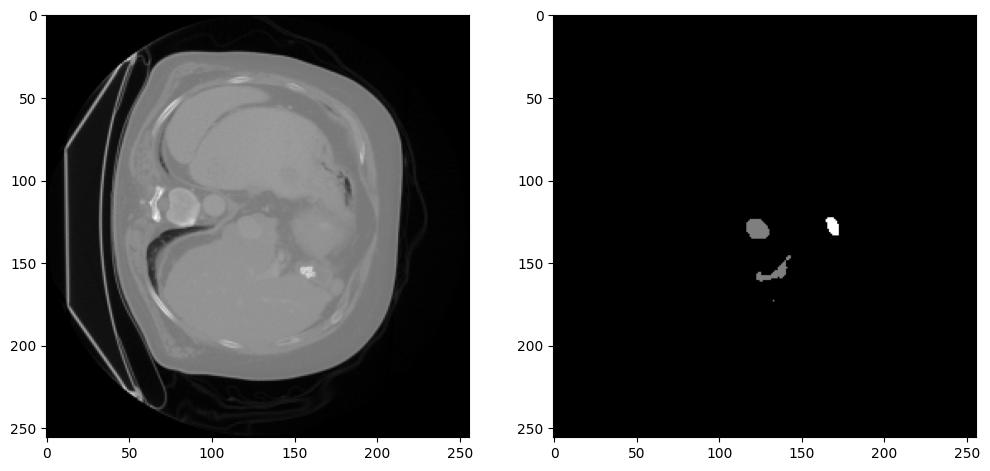

In [11]:
image_number = random.randint(0, len(train_images) - 1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(train_images[image_number], cmap='gray')
plt.subplot(122)
plt.imshow(train_masks[image_number], cmap='gray')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

# First split into 80% train+validation and 20% test
train_val_images, test_images, train_val_masks, test_masks = train_test_split(
    train_images, train_masks, test_size=0.2, random_state=42
)

# Further split the 80% train+validation into 75% train and 25% validation
train_images, val_images, train_masks, val_masks = train_test_split(
    train_val_images, train_val_masks, test_size=0.25, random_state=42
)  # 0.25 x 0.8 = 0.2 validation

# Convert lists to NumPy arrays
train_images = np.array(train_images)
train_masks = np.array(train_masks)
val_images = np.array(val_images)
val_masks = np.array(val_masks)

# Print shapes to verify
print("Training images shape:", train_images.shape)
print("Training masks shape:", train_masks.shape)
print("Validation images shape:", val_images.shape)
print("Validation masks shape:", val_masks.shape)

Training images shape: (953,)
Training masks shape: (953,)
Validation images shape: (318,)
Validation masks shape: (318,)


In [ ]:
# Normalize images to the range [0, 1]
train_images = train_images / 255.0

# Define val_images and test_images if not already defined
val_images = np.array(val_images) / 255.0
test_images = np.array(test_images) / 255.0

# One-hot encode the masks
from tensorflow.keras.utils import to_categorical

# Ensure masks are integers before one-hot encoding
train_masks = train_masks.astype(np.int32)
val_masks = val_masks.astype(np.int32)
test_masks = test_masks.astype(np.int32)


In [28]:
# Split dataset
train_images, test_images, train_masks, test_masks = train_test_split(image_files, mask_files, test_size=0.2, random_state=42)
train_images, val_images, train_masks, val_masks = train_test_split(train_images, train_masks, test_size=0.25, random_state=42)